In [159]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import set_random_seed
set_random_seed(2)
from numpy.random import seed
seed(2)

In [160]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from tensorflow.keras import backend as K


In [161]:
img_width=100
img_height=100
nb_train=649
nb_valid=153

In [183]:
train_data_dir="C:\\Users\\exam\\Desktop\\Set-1\\train"
validation_data_dir="C:\\Users\\exam\\Desktop\\Set-1\\test"
epochs=10
batch_size=10

In [184]:
if K.image_data_format=='channels_first':
    input_shape=(3,img_width,img_height)
else:
    input_shape=(img_width,img_height,3)

In [185]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('sigmoid'))


In [186]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [187]:
train_datagen=ImageDataGenerator(rescale=1. /255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1. /255)

In [188]:
train_generator=train_datagen.flow_from_directory(train_data_dir,target_size=(img_width,img_height),batch_size=batch_size,
                                                 class_mode='categorical')
print(train_generator.class_indices)

Found 649 images belonging to 5 classes.
{'Apple Crimson Snow': 0, 'Banana': 1, 'Cactus fruit': 2, 'Kiwi': 3, 'Mango': 4}


In [189]:
valid_generator=test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width,img_height),batch_size=batch_size,
                                                 class_mode='categorical')

Found 153 images belonging to 5 classes.


In [ ]:
import scipy.ndimage
history=model.fit_generator(train_generator,steps_per_epoch=nb_train,epochs=epochs,
                            validation_data=valid_generator,validation_steps=nb_valid)

Epoch 1/10
649/649 [==============================] - 60s 92ms/step - loss: nan - acc: 0.1618 - val_loss: nan - val_acc: 0.2802
Epoch 2/10
649/649 [==============================] - 59s 91ms/step - loss: nan - acc: 0.1620 - val_loss: nan - val_acc: 0.2829
Epoch 3/10
649/649 [==============================] - 58s 90ms/step - loss: nan - acc: 0.1615 - val_loss: nan - val_acc: 0.2829
Epoch 4/10
649/649 [==============================] - 58s 90ms/step - loss: nan - acc: 0.1618 - val_loss: nan - val_acc: 0.2836
Epoch 5/10
649/649 [==============================] - 59s 91ms/step - loss: nan - acc: 0.1625 - val_loss: nan - val_acc: 0.2815
Epoch 6/10
649/649 [==============================] - 58s 90ms/step - loss: nan - acc: 0.1604 - val_loss: nan - val_acc: 0.2802
Epoch 7/10
649/649 [==============================] - 58s 90ms/step - loss: nan - acc: 0.1637 - val_loss: nan - val_acc: 0.2815
Epoch 8/10
649/649 [==============================] - 59s 90ms/step - loss: nan - acc: 0.1604 - val_loss

Text(0.5, 1.0, 'Training,Validation accuracy')

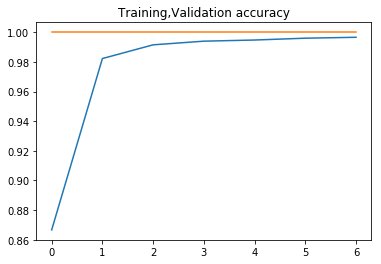

In [178]:
import matplotlib.pyplot as plt
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs,acc,label='Training')
plt.plot(epochs,val_acc,label='validation')
plt.title('Training,Validation accuracy')
#plt.xlabel()
#plt.ylabel()


Text(0.5, 1.0, 'Training,Validation Loss')

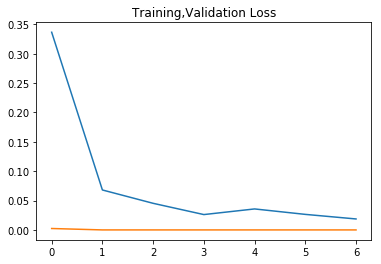

In [182]:
plt.plot(epochs,loss,label='Training')
plt.plot(epochs,val_loss,label='validation')
plt.title('Training,Validation Loss')

In [179]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile,join

In [180]:
valid_data_path="C:\\Users\\exam\\Desktop\\Set-1\\valid"
onlyfiles=[f for f in listdir(valid_data_path) if isfile(join(valid_data_path,f))]
print(onlyfiles)
apples=0
bananas=0
kiwis=0
cacfruits=0
mangoes=0
for i in onlyfiles:
    img=image.load_img(valid_data_path+"/"+i,target_size=(img_width,img_height))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    classes=model.predict_classes(images,batch_size=10)
    if(classes==0):
        print(i+":"+'Apple')
        apples=apples+1
    elif(classes==1):
        print(i+":"+'Banana')
        bananas=bananas+1
    elif(classes==2):
        print(i+":"+'Cactus Fruit')
        cacfruits=cacfruits+1
    elif(classes==3):
        print(i+":"+'Kiwi')
        kiwis=kiwis+1
    elif(classes==4):
        print(i+":"+'Mango')
        mangoes=mangoes+1
print(apples,bananas,kiwis,cacfruits,mangoes)

['100_100.jpg', '102_100.jpg', '110_100.jpg', '111_100.jpg', '115_100.jpg', '116_100.jpg', '120_100.jpg', '123_100.jpg', '129_100.jpg', '132_100.jpg', '144_100.jpg', '148_100.jpg', '153_100.jpg', '162_100.jpg', '166_100.jpg', '16_100.jpg', '17_100.jpg', '195_100.jpg', '196_100.jpg', '207_100.jpg', '213_100.jpg', '249_100.jpg', '252_100.jpg', '255_100.jpg', '25_100.jpg', '263_100.jpg', '296_100.jpg', '29_100.jpg', '301_100.jpg', '310_100.jpg', '46_100.jpg', '86_100.jpg', '96_100.jpg', '98_100.jpg', 'r_15_100.jpg', 'r_18_100.jpg', 'r_268_100.jpg', 'r_4_100.jpg', 'r_6_100.jpg']
100_100.jpg:Apple
102_100.jpg:Banana
110_100.jpg:Banana
111_100.jpg:Banana
115_100.jpg:Banana
116_100.jpg:Apple
120_100.jpg:Apple
123_100.jpg:Apple
129_100.jpg:Apple
132_100.jpg:Apple
144_100.jpg:Apple
148_100.jpg:Apple
153_100.jpg:Apple
162_100.jpg:Apple
166_100.jpg:Apple
16_100.jpg:Apple
17_100.jpg:Apple
195_100.jpg:Cactus Fruit
196_100.jpg:Cactus Fruit
207_100.jpg:Cactus Fruit
213_100.jpg:Cactus Fruit
249_100.jp

In [181]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred=model.predict_generator(valid_generator,batch_size)
y_pred=np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes,y_pred))
print('Classification Report')
target_names=['Apple Crimson Snow','Banana','Cactus Fruit','Kiwi','Mango']
print(classification_report(valid_generator_classes,y_pred,target_names=target_names))

Confusion Matrix


ValueError: Found input variables with inconsistent numbers of samples: [153, 100]